In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

In [15]:
# neural net definition
class Net_2_hidden_layers(nn.Module):
    def __init__(self, input_size, hidden_1_size, hidden_2_size, output_size, activation_func='ReLU'):
        super().__init__()
        torch.manual_seed(0)
        self.fc1 = nn.Linear(input_size, hidden_1_size)    # Fully connected layer 1
        self.fc2 = nn.Linear(hidden_1_size, hidden_2_size) # Fully connected layer 2
        self.fc3 = nn.Linear(hidden_2_size, output_size)   # Fully connected layer 3
        if activation_func=='ReLU':
          self.func = nn.ReLU()                          # ReLU activation
        elif activation_func=='sigmoid':
          self.func = nn.Sigmoid()                      # Sigmoid activation
        elif activation_func=='tanh':
          self.func = nn.Tanh()                         # hyperbolic tangent
        else:
          raise NameError('activation_func function ' + activation_func + ' not supported yet!')

    def forward(self, x):
        out = self.fc1(x)
        out = self.func(out) # F(Ax+b)
        out = self.fc2(out)
        out = self.func(out) # F(Ax+b)
        out = self.fc3(out)
        return out

input_dim = 2
hidden_1_dim = 20
hidden_2_dim = 10
output_dim = 1
func='ReLU'
model = Net_2_hidden_layers(input_dim, hidden_1_dim, hidden_2_dim, output_dim,activation_func=func)


In [16]:
# training set and loss function defintion
number_samples = 20 # training set
xa = -5; xb = 5; # both x1 and x2 are in the same interval here [-5,5]
torch.manual_seed(20) # inicializando com 20 tem gerado pontos mais espaçados no plano x1, x2
x_true = xa + (xb - xa) * torch.rand(number_samples, input_dim)
y_true = torch.pow(x_true[:,0],2) + torch.pow(x_true[:,1],2)
#plt.scatter(x_true[:,0],x_true[:,1])

# training settings
learning_rate = 0.01
number_epochs = 4000

# loss function definition
# Loss function for regression: Mean Squared Error
loss_function = nn.MSELoss() # L2 norm
train_loss_sum_vec = []

# Optimizer
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
#optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [17]:
# training process (running over epochs)
for epoch in range(number_epochs):
  model.train()
  # forward pass
  # https://docs.pytorch.org/docs/stable/generated/torch.squeeze.html
  y_pred = model(x_true).squeeze() # o squeeze remove a dimensão '1' do tensor. Isso é feito aqui para que y_pred e y_true possam ser compatíveis
  loss = loss_function(y_pred,y_true)
  train_loss_sum = loss.item()
  # backward
  optimizer.zero_grad() # zera os gradientes https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch
  loss.backward()  # cálculo do gradiente
  optimizer.step() # pesos e bias são ajustados
  train_loss_sum_vec.append(train_loss_sum)

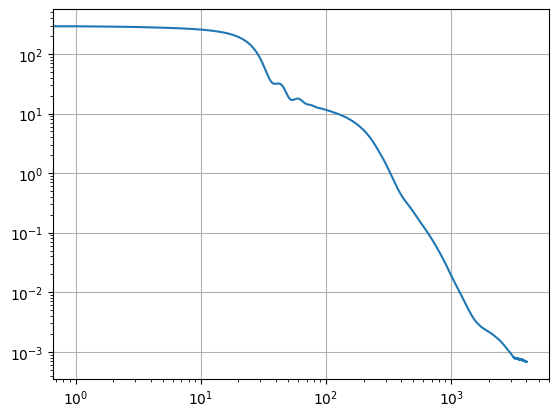

In [18]:
# post-processing
plt.plot(range(number_epochs),train_loss_sum_vec)
plt.yscale('log')
plt.xscale('log')
plt.grid(True)
plt.show()

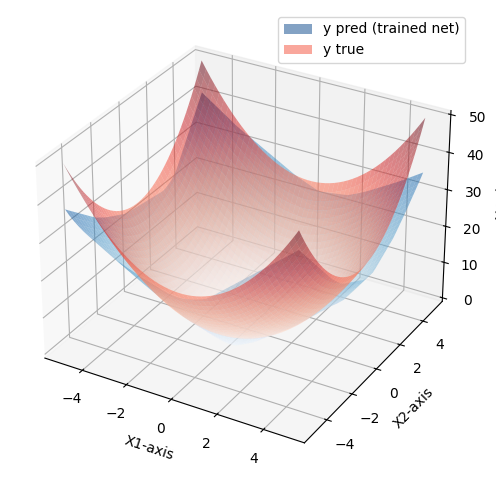

In [19]:
# applying the trained net for not seen data
from matplotlib import cm
grid_step = 50
xs = torch.linspace(xa, xb, steps=grid_step)
ys = torch.linspace(xa, xb, steps=grid_step)
xg,yg = torch.meshgrid(xs, ys, indexing='xy')
s = xs.size(0)
xyg = torch.zeros([s,s,2])

xyg[:,:,0] = xg
xyg[:,:,1] = yg

y_pred = model.forward(xyg)
y_pred = torch.squeeze(y_pred)

y_true = xg**2 + yg**2

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(xg, yg, y_pred.detach().numpy(), vmin=0. * 2, cmap=cm.Blues, alpha=0.5,label='y pred (trained net)')
ax.plot_surface(xg, yg, y_true, vmin=0.0 * 2, cmap=cm.Reds, alpha=0.5,label='y true')
ax.set_xlabel('X1-axis')
ax.set_ylabel('X2-axis')
ax.set_zlabel('Y-axis')
ax.legend()
plt.show()